In [42]:
import pandas as pd
data_path=r"C:\Users\ABDIWAHAB\Desktop\MY\data analysis orojects\customer_shopping_data.csv"
data=pd.read_csv(data_path)

In [2]:
print(data.head(50))

   invoice_no customer_id  gender  age         category  quantity    price  \
0     I138884     C241288  Female   28         Clothing         5  1500.40   
1     I317333     C111565    Male   21            Shoes         3  1800.51   
2     I127801     C266599    Male   20         Clothing         1   300.08   
3     I173702     C988172  Female   66            Shoes         5  3000.85   
4     I337046     C189076  Female   53            Books         4    60.60   
5     I227836     C657758  Female   28         Clothing         5  1500.40   
6     I121056     C151197  Female   49        Cosmetics         1    40.66   
7     I293112     C176086  Female   32         Clothing         2   600.16   
8     I293455     C159642    Male   69         Clothing         3   900.24   
9     I326945     C283361  Female   60         Clothing         2   600.16   
10    I306368     C240286  Female   36  Food & Beverage         2    10.46   
11    I139207     C191708  Female   29            Books         

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [4]:
print(data.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


In [5]:
print(data.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [10]:

data_cleaned = data.drop_duplicates()

baskets = data_cleaned.groupby(['invoice_no', 'gender'])['category'].apply(list).reset_index()

print(baskets.head(20))

print(data_cleaned.shape)


   invoice_no  gender           category
0     I100008    Male         [Clothing]
1     I100014    Male        [Cosmetics]
2     I100015  Female         [Clothing]
3     I100024  Female            [Books]
4     I100027  Female       [Technology]
5     I100028  Female         [Clothing]
6     I100031    Male  [Food & Beverage]
7     I100033    Male  [Food & Beverage]
8     I100037  Female         [Clothing]
9     I100041  Female        [Cosmetics]
10    I100049    Male            [Shoes]
11    I100053  Female        [Cosmetics]
12    I100057  Female         [Clothing]
13    I100059  Female         [Souvenir]
14    I100068  Female             [Toys]
15    I100071  Female         [Clothing]
16    I100072    Male       [Technology]
17    I100077    Male  [Food & Beverage]
18    I100078    Male            [Books]
19    I100080    Male             [Toys]
(99457, 10)


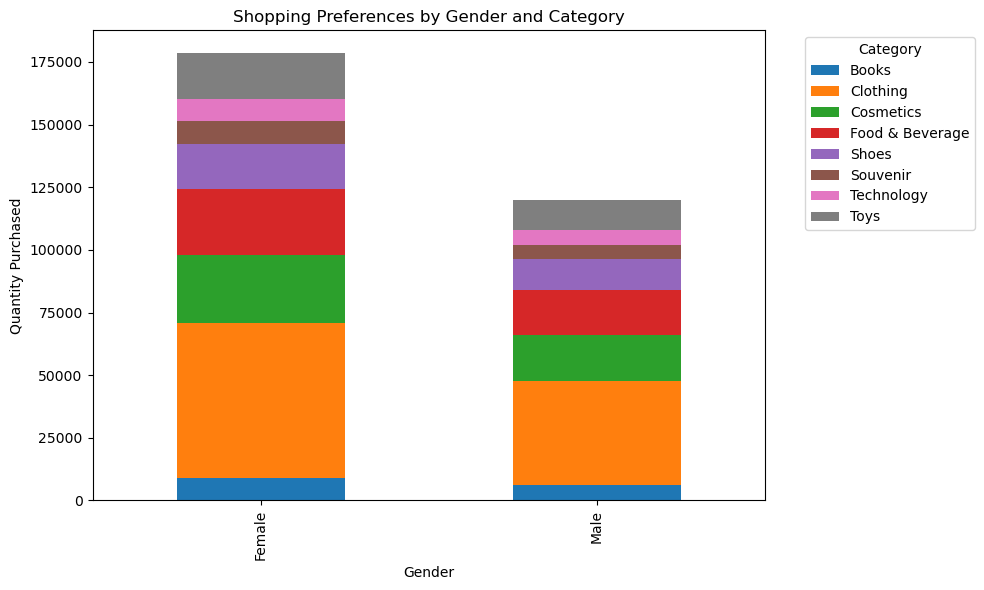

In [13]:
import matplotlib.pyplot as plt


gender_category_count = data.groupby(['gender', 'category'])['quantity'].sum().unstack(fill_value=0)

gender_category_count.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title("Shopping Preferences by Gender and Category")
plt.xlabel("Gender")
plt.ylabel("Quantity Purchased")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


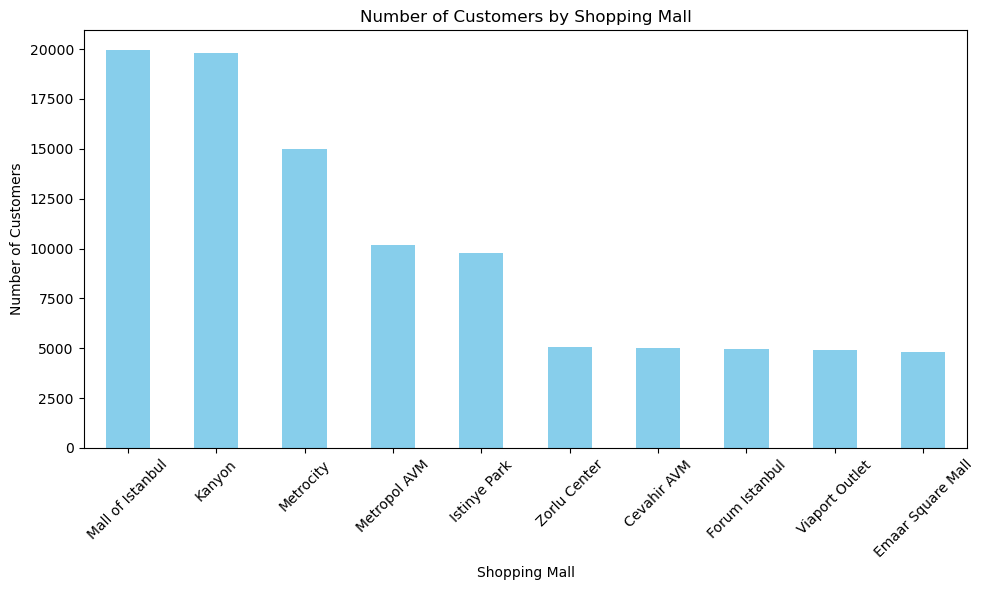

In [16]:

company_customer_count = data['shopping_mall'].value_counts()


plt.figure(figsize=(10, 6))
company_customer_count.plot(kind='bar', color='skyblue')
plt.title("Number of Customers by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


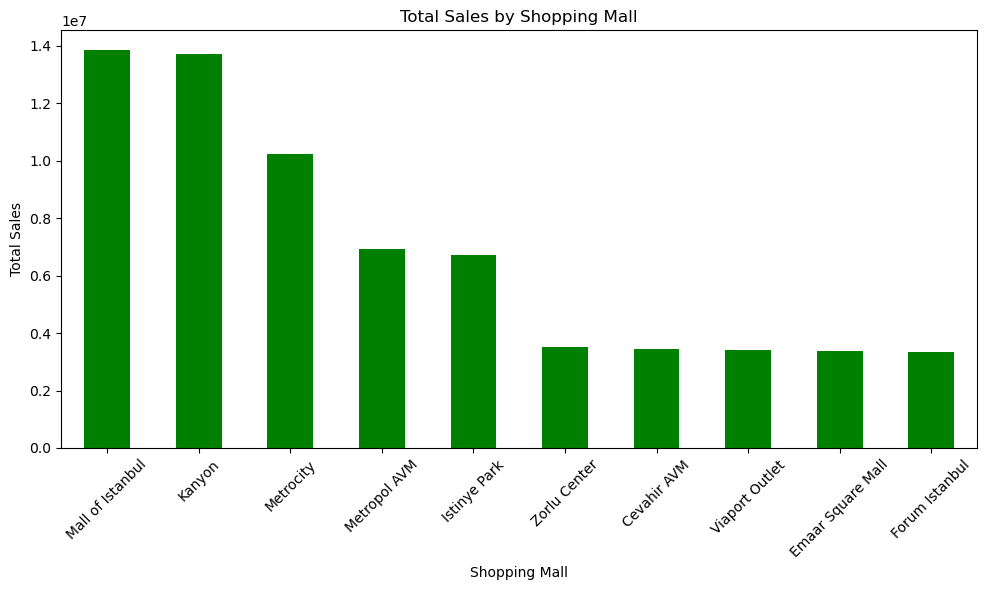

In [17]:

company_sales = data.groupby('shopping_mall')['price'].sum()


plt.figure(figsize=(10, 6))
company_sales.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Total Sales by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


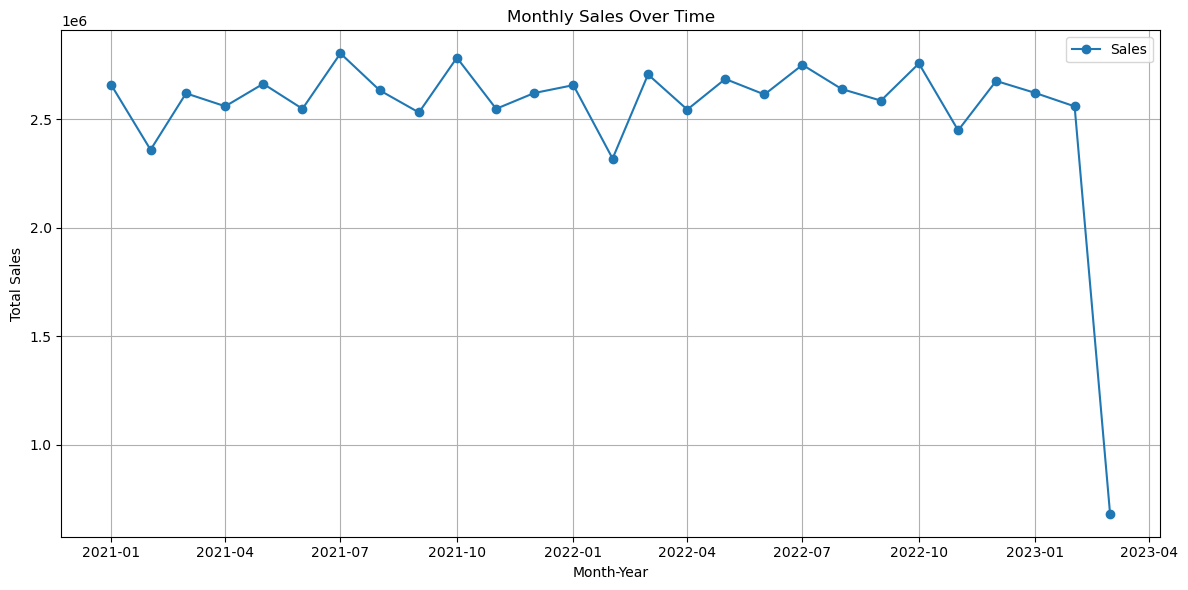

In [14]:

data['invoice_date'] = pd.to_datetime(data['invoice_date'], dayfirst=True)


data['month'] = data['invoice_date'].dt.month
data['year'] = data['invoice_date'].dt.year

monthly_sales = data.groupby(['year', 'month'])['price'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['price'], marker='o', label='Sales')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
pip install mlxtend

In [18]:
catagories= data['category'].unique()
print("all catagories")
print(catagories)


all catagories
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [19]:
from mlxtend.preprocessing import TransactionEncoder
transaction_list = baskets['category'].tolist()
te = TransactionEncoder()
te_data = te.fit_transform(transaction_list)
transaction_df = pd.DataFrame(te_data, columns=te.columns_)
print("Preview of the one-hot encoded transaction data:")
print(transaction_df.head(20))


Preview of the one-hot encoded transaction data:
    Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  Technology  \
0   False      True      False            False  False     False       False   
1   False     False       True            False  False     False       False   
2   False      True      False            False  False     False       False   
3    True     False      False            False  False     False       False   
4   False     False      False            False  False     False        True   
5   False      True      False            False  False     False       False   
6   False     False      False             True  False     False       False   
7   False     False      False             True  False     False       False   
8   False      True      False            False  False     False       False   
9   False     False       True            False  False     False       False   
10  False     False      False            False   True     False       

In [20]:
pip install mlxtend --upgrade

Note: you may need to restart the kernel to use updated packages.


In [21]:
data = {'Invoice': [1, 1, 2, 2, 3, 4, 4],
        'Item': ['Clothing', 'Shoes', 'Clothing', 'Cosmetics', 'Books', 'Technology', 'Souvenir']}


In [22]:

df = pd.DataFrame(data)


all_categories = ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Technology', 'Souvenir']

transaction_df = df.groupby(['Invoice', 'Item']).size().unstack(fill_value=0).applymap(lambda x: 1 if x > 0 else 0)


transaction_df = transaction_df.reindex(columns=all_categories, fill_value=0)

print("Binary-encoded transaction DataFrame:")
print(transaction_df)


Binary-encoded transaction DataFrame:
Item     Clothing  Shoes  Books  Cosmetics  Technology  Souvenir
Invoice                                                         
1               1      1      0          0           0         0
2               1      0      0          1           0         0
3               0      0      1          0           0         0
4               0      0      0          0           1         1


C:\Users\ABDIWAHAB\AppData\Local\Temp\ipykernel_18612\3810246409.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_df = df.groupby(['Invoice', 'Item']).size().unstack(fill_value=0).applymap(lambda x: 1 if x > 0 else 0)


In [26]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd


transaction_list = baskets['category'].tolist()


all_categories = ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']


te = TransactionEncoder()
te_data = te.fit_transform(transaction_list)

transaction_df = pd.DataFrame(te_data, columns=te.columns_)

transaction_df = transaction_df.reindex(columns=all_categories, fill_value=False)

print("Preview of the one-hot encoded transaction data:")
print(transaction_df.head(20))


Preview of the one-hot encoded transaction data:
    Clothing  Shoes  Books  Cosmetics  Food & Beverage   Toys  Technology  \
0       True  False  False      False            False  False       False   
1      False  False  False       True            False  False       False   
2       True  False  False      False            False  False       False   
3      False  False   True      False            False  False       False   
4      False  False  False      False            False  False        True   
5       True  False  False      False            False  False       False   
6      False  False  False      False             True  False       False   
7      False  False  False      False             True  False       False   
8       True  False  False      False            False  False       False   
9      False  False  False       True            False  False       False   
10     False   True  False      False            False  False       False   
11     False  False  False 

In [29]:
all_categories = ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
transaction_df = transaction_df.reindex(columns=all_categories, fill_value=0)


In [30]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


transactions = [
    ['Clothing', 'Shoes'],
    ['Books', 'Clothing'],
    ['Clothing'],
    ['Shoes', 'Toys'],
    ['Clothing', 'Cosmetics'],
    ['Technology'],  
    ['Food & Beverage'],  
    ['Souvenir'] 
]


te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
transaction_data = pd.DataFrame(te_array, columns=te.columns_)


all_categories = ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
transaction_data = transaction_data.reindex(columns=all_categories, fill_value=0)


print("Transaction DataFrame:")
print(transaction_data)


frequent_itemsets = apriori(transaction_data, min_support=0.01, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets)


Transaction DataFrame:
   Clothing  Shoes  Books  Cosmetics  Food & Beverage   Toys  Technology  \
0      True   True  False      False            False  False       False   
1      True  False   True      False            False  False       False   
2      True  False  False      False            False  False       False   
3     False   True  False      False            False   True       False   
4      True  False  False       True            False  False       False   
5     False  False  False      False            False  False        True   
6     False  False  False      False             True  False       False   
7     False  False  False      False            False  False       False   

   Souvenir  
0     False  
1     False  
2     False  
3     False  
4     False  
5     False  
6     False  
7      True  

Frequent Itemsets:
    support               itemsets
0     0.500             (Clothing)
1     0.250                (Shoes)
2     0.125                (Books)
3     

In [31]:
from mlxtend.frequent_patterns import apriori


frequent_itemsets = apriori(transaction_data, min_support=0.01, use_colnames=True)
print(frequent_itemsets)


    support               itemsets
0     0.500             (Clothing)
1     0.250                (Shoes)
2     0.125                (Books)
3     0.125            (Cosmetics)
4     0.125      (Food & Beverage)
5     0.125                 (Toys)
6     0.125           (Technology)
7     0.125             (Souvenir)
8     0.125      (Shoes, Clothing)
9     0.125      (Clothing, Books)
10    0.125  (Clothing, Cosmetics)
11    0.125          (Shoes, Toys)


In [32]:
from itertools import combinations


frequent_itemsets_list = frequent_itemsets['itemsets'].tolist()


rules_list = []
for itemset in frequent_itemsets_list:
    print(f"Processing itemset: {itemset}")
    if len(itemset) > 1:  
        for antecedent in combinations(itemset, len(itemset) - 1):
            consequent = set(itemset) - set(antecedent)
            antecedent_support = frequent_itemsets[frequent_itemsets['itemsets'] == set(antecedent)]['support'].values
            rule_support = frequent_itemsets[frequent_itemsets['itemsets'] == set(itemset)]['support'].values
            consequent_support = frequent_itemsets[frequent_itemsets['itemsets'] == consequent]['support'].values
            
            print(f"Antecedent: {antecedent}, Consequent: {consequent}")
            print(f"Antecedent support: {antecedent_support}, Rule support: {rule_support}, Consequent support: {consequent_support}")

            if antecedent_support.size > 0 and rule_support.size > 0 and consequent_support.size > 0:
                antecedent_support = antecedent_support[0]
                rule_support = rule_support[0]
                consequent_support = consequent_support[0]
                
                confidence = rule_support / antecedent_support

            
                if confidence >= 0.5:
                    rules_list.append({
                        'antecedents': set(antecedent),
                        'consequents': consequent,
                        'support': rule_support,
                        'confidence': confidence,
                        'lift': confidence / consequent_support
                    })

rules_df = pd.DataFrame(rules_list)
print("\nGenerated Association Rules (Before Sorting):")
print(rules_df)

if not rules_df.empty and 'lift' in rules_df.columns:
    rules_df = rules_df.sort_values(by="lift", ascending=False)

print("\nGenerated Association Rules:")
print(rules_df.head(20))


Processing itemset: frozenset({'Clothing'})
Processing itemset: frozenset({'Shoes'})
Processing itemset: frozenset({'Books'})
Processing itemset: frozenset({'Cosmetics'})
Processing itemset: frozenset({'Food & Beverage'})
Processing itemset: frozenset({'Toys'})
Processing itemset: frozenset({'Technology'})
Processing itemset: frozenset({'Souvenir'})
Processing itemset: frozenset({'Shoes', 'Clothing'})
Antecedent: ('Shoes',), Consequent: {'Clothing'}
Antecedent support: [0.25], Rule support: [0.125], Consequent support: [0.5]
Antecedent: ('Clothing',), Consequent: {'Shoes'}
Antecedent support: [0.5], Rule support: [0.125], Consequent support: [0.25]
Processing itemset: frozenset({'Clothing', 'Books'})
Antecedent: ('Clothing',), Consequent: {'Books'}
Antecedent support: [0.5], Rule support: [0.125], Consequent support: [0.125]
Antecedent: ('Books',), Consequent: {'Clothing'}
Antecedent support: [0.125], Rule support: [0.125], Consequent support: [0.5]
Processing itemset: frozenset({'Clot

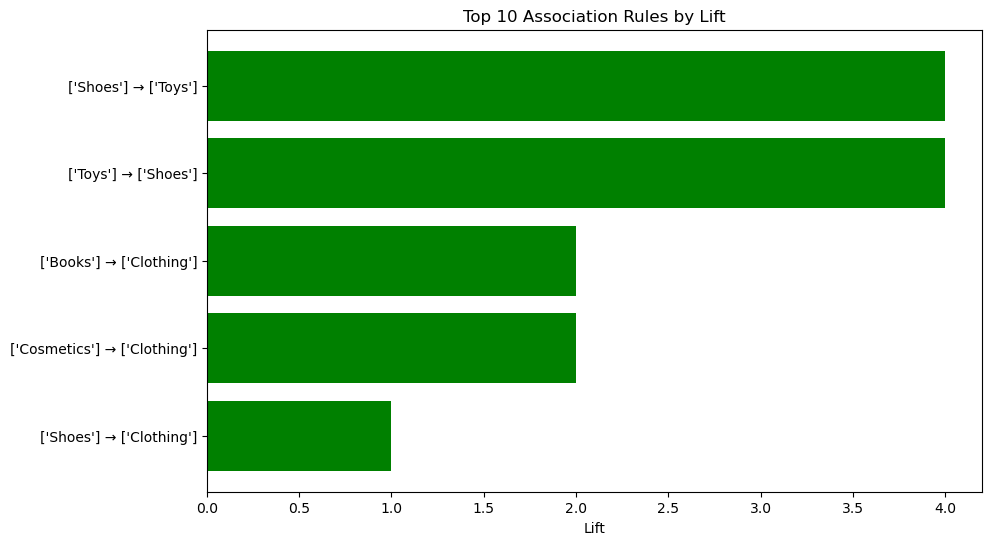

In [33]:
import matplotlib.pyplot as plt


top_rules = rules_df.nlargest(10, 'lift')


plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], color='green')


plt.yticks(
    range(len(top_rules)),
    [f"{list(rule[0])} → {list(rule[1])}" for rule in zip(top_rules['antecedents'], top_rules['consequents'])]
)
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  
plt.show()


In [45]:
def recommend_category(user_input, rules_df):
   
    user_item = frozenset([user_input.strip().lower()])

    rules_df['antecedents'] = rules_df['antecedents'].apply(lambda x: frozenset([item.lower() for item in x]))
    rules_df['consequents'] = rules_df['consequents'].apply(lambda x: frozenset([item.lower() for item in x]))
    
  
    matching_rules_as_antecedent = rules_df[rules_df['antecedents'] == user_item]
    matching_rules_as_consequent = rules_df[rules_df['consequents'] == user_item]

    recommendations = set()
    for consequent in matching_rules_as_antecedent['consequents']:
        recommendations.update(consequent)
    
    for antecedent in matching_rules_as_consequent['antecedents']:
        recommendations.update(antecedent)
    

    recommendations.discard(user_input.lower())
    

    if recommendations:
        return {item.capitalize() for item in recommendations}  
    else:
        return f"No recommendations available for the category '{user_input}'."

# User interaction loop
while True:
    user_input = input("\nEnter a category you are buying (or type 'exit' to quit): ").strip()
    
    if user_input.lower() == 'exit':
        print("Exiting the recommendation system. Thank you!")
        break
    
    if user_input == "":
        print("Please enter a valid category.")
        continue
    
    recommendations = recommend_category(user_input, rules_df)
    print(f"Recommendations for '{user_input.capitalize()}': {recommendations}")



Enter a category you are buying (or type 'exit' to quit):  clothing


Recommendations for 'Clothing': {'Shoes', 'Books', 'Cosmetics'}



Enter a category you are buying (or type 'exit' to quit):  shoes


Recommendations for 'Shoes': {'Clothing', 'Toys'}



Enter a category you are buying (or type 'exit' to quit):  toys


Recommendations for 'Toys': {'Shoes'}



Enter a category you are buying (or type 'exit' to quit):  exit


Exiting the recommendation system. Thank you!


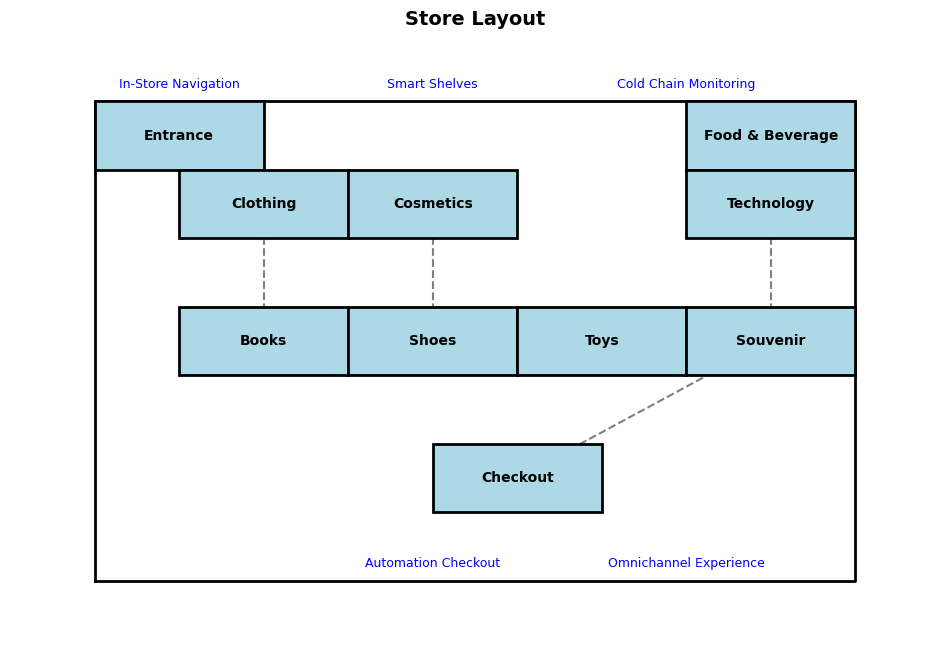

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_store_layout_with_adjusted_positions():

    fig, ax = plt.subplots(figsize=(12, 8))

   
    sections = {
        "Entrance": (0, 6, 2, 1),
        "Clothing": (1, 5, 2, 1),
        "Cosmetics": (3, 5, 2, 1),
        "Books": (1, 3, 2, 1),
        "Shoes": (3, 3, 2, 1),
        "Toys": (5, 3, 2, 1),
        "Food & Beverage": (7, 6, 2, 1),  
        "Technology": (7, 5, 2, 1),
        "Souvenir": (7, 3, 2, 1),
        "Checkout": (4, 1, 2, 1),
    }


    aisles = [
        ("Entrance", "Clothing"),
        ("Clothing", "Cosmetics"),
        ("Clothing", "Books"),
        ("Cosmetics", "Shoes"),
        ("Books", "Shoes"),
        ("Shoes", "Toys"),
        ("Toys", "Souvenir"),  
        ("Food & Beverage", "Technology"),
        ("Technology", "Souvenir"),
        ("Souvenir", "Checkout"),
    ]


    for section, (x, y, w, h) in sections.items():
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='black', facecolor='lightblue', zorder=2)
        ax.add_patch(rect)
        ax.text(x + w / 2, y + h / 2, section, fontsize=10, ha='center', va='center', fontweight='bold', zorder=3)

    # Draw the aisles
    for start, end in aisles:
        if start in sections and end in sections:
            x1, y1 = sections[start][0] + sections[start][2] / 2, sections[start][1] + sections[start][3] / 2
            x2, y2 = sections[end][0] + sections[end][2] / 2, sections[end][1] + sections[end][3] / 2
            ax.plot([x1, x2], [y1, y2], "gray", linestyle="--", zorder=1)

    # Store boundary
    ax.plot([0, 9, 9, 0, 0], [0, 0, 7, 7, 0], color="black", linewidth=2, zorder=0)


    ax.text(1, 7.2, "In-Store Navigation", fontsize=9, ha="center", color="blue")  # Above Entrance
    ax.text(4, 7.2, "Smart Shelves", fontsize=9, ha="center", color="blue")  # Above center
    ax.text(7, 7.2, "Cold Chain Monitoring", fontsize=9, ha="center", color="blue")  # Above Technology
    ax.text(4, 0.2, "Automation Checkout", fontsize=9, ha="center", color="blue")  # Below Checkout
    ax.text(7, 0.2, "Omnichannel Experience", fontsize=9, ha="center", color="blue")  # Below Souvenir

    # Adjust layout
    plt.title("Store Layout", fontsize=14, fontweight="bold")
    ax.set_xlim(-1, 10)
    ax.set_ylim(-1, 8)
    plt.axis("off")
    plt.show()

draw_store_layout_with_adjusted_positions()
